<a href="https://colab.research.google.com/github/mairovitzmario/data_science_notebooks/blob/main/mushrooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Load Kaggle Data

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 70 bytes


In [ ]:
dataset_link = "uciml/mushroom-classification"

In [ ]:
author, name = dataset_link.split('/')[:2]

In [ ]:
!kaggle datasets download -d {dataset_link}

Dataset URL: https://www.kaggle.com/datasets/uciml/mushroom-classification
License(s): CC0-1.0
  0% 0.00/34.2k [00:00<?, ?B/s]
100% 34.2k/34.2k [00:00<00:00, 96.9MB/s]


In [ ]:
zip_filename = f"/content/{name}.zip"

# Unzip the dataset
!unzip -q {zip_filename} -d /content/{name}

In [ ]:
import pandas as pd

df = pd.read_csv(f'/content/{name}/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# 1. Explore Data

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
print(df.nunique())

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64


We are dealing with only categorical data

In [ ]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
for col in df.columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print()

Value counts for class:
class
e    4208
p    3916
Name: count, dtype: int64

Value counts for cap-shape:
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

Value counts for cap-surface:
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

Value counts for cap-color:
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

Value counts for bruises:
bruises
f    4748
t    3376
Name: count, dtype: int64

Value counts for odor:
odor
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64

Value counts for gill-attachment:
gill-attachment
f    7914
a     210
Name: count, dtype: int64

Value counts for gill-spacing:
gill-spacing
c    6812
w    1312
Name: count, dtype: int64

Value counts for gill-size:
gill-size
b    5612
n    2512
Name: count, dtype: int64

Value counts for gill-col

In [ ]:
df.isna().sum().sum()

np.int64(0)

No null values present

## Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

mushroom, mushroom_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['class'])

## Further exploration

In [ ]:
mushroom['class'].value_counts()

,count
class,
e,3366
p,3133


e -> edible  
p -> poisonous

Checking the distributions based on the class category

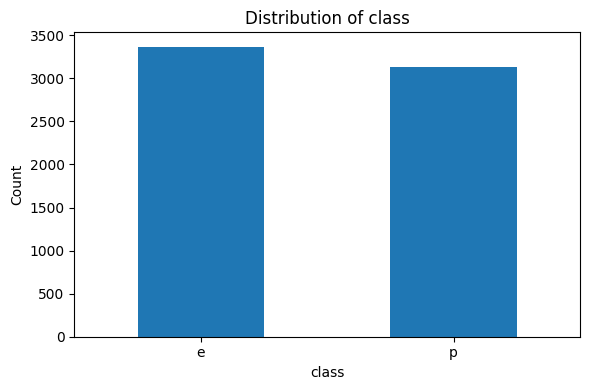

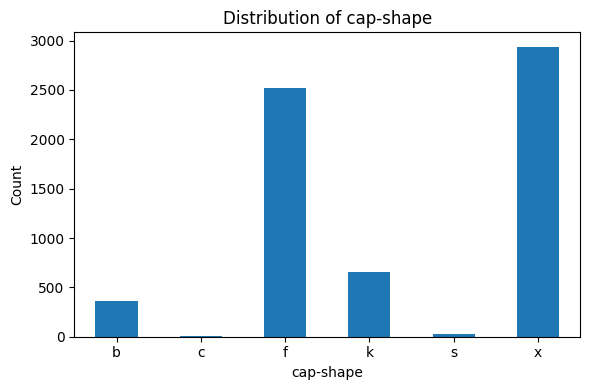

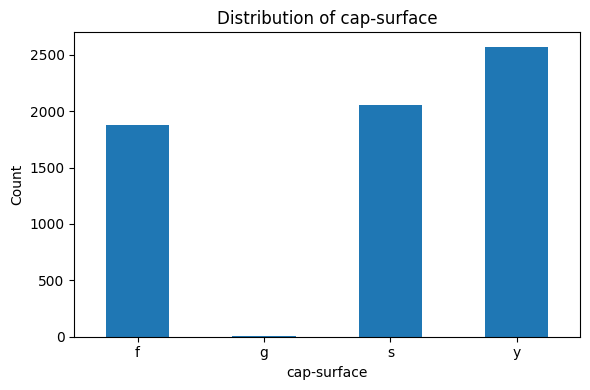

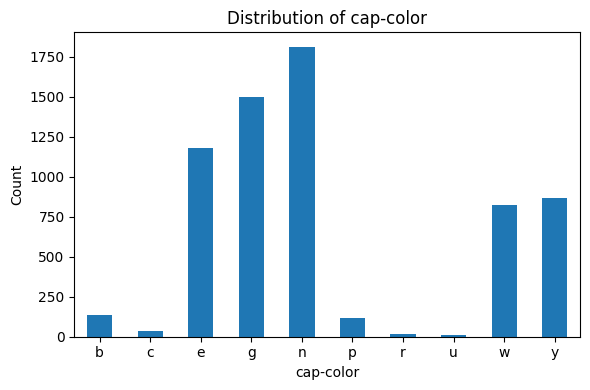

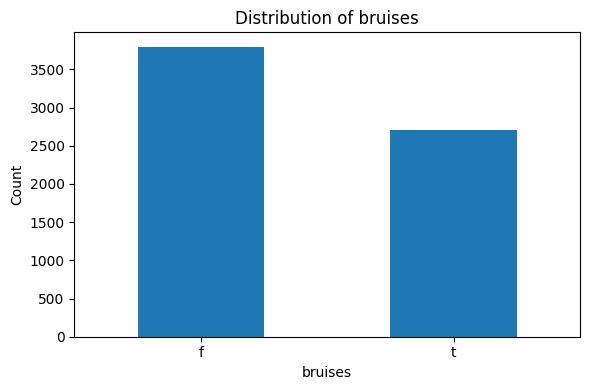

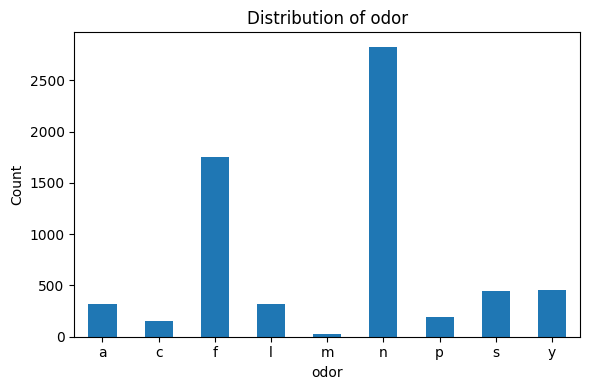

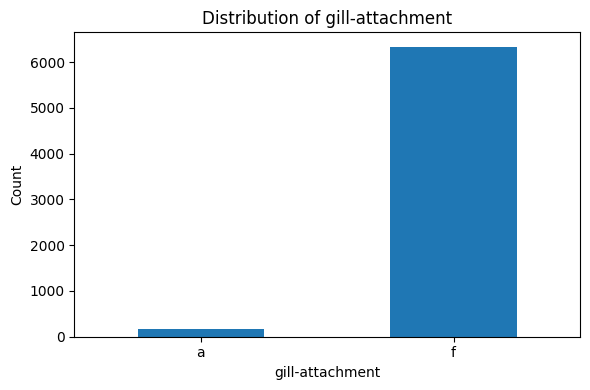

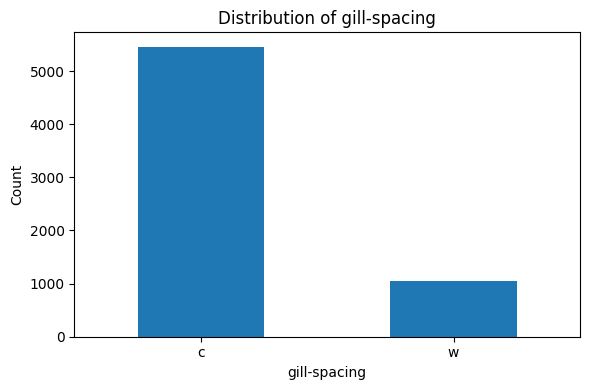

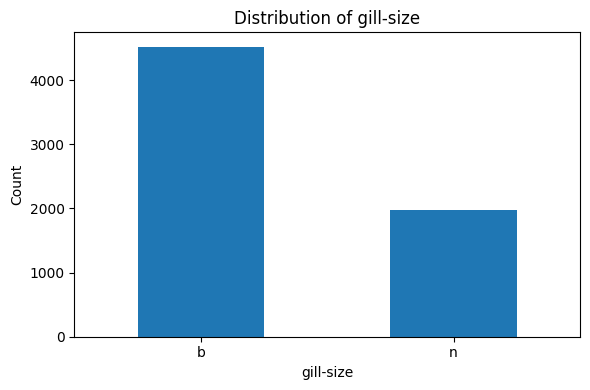

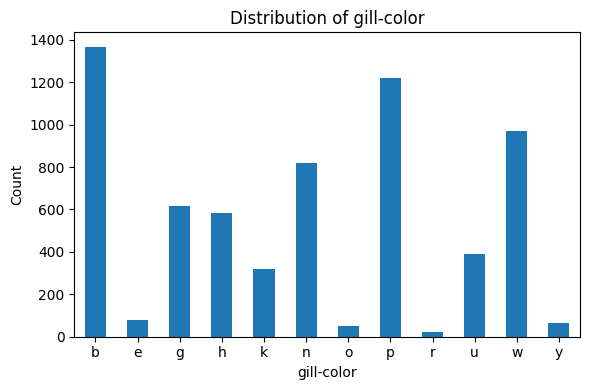

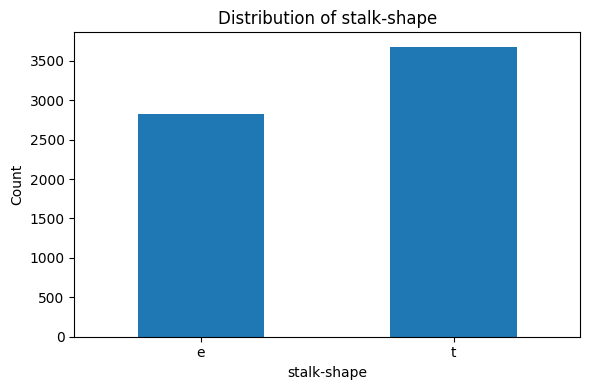

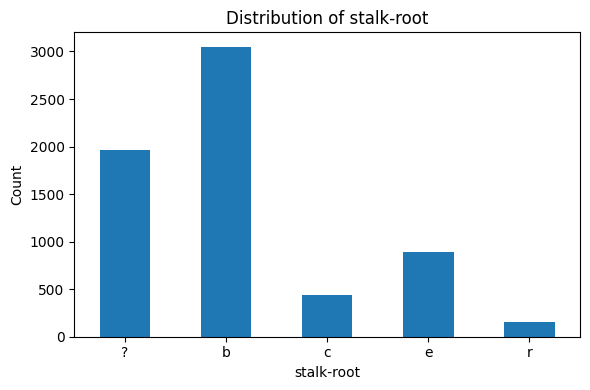

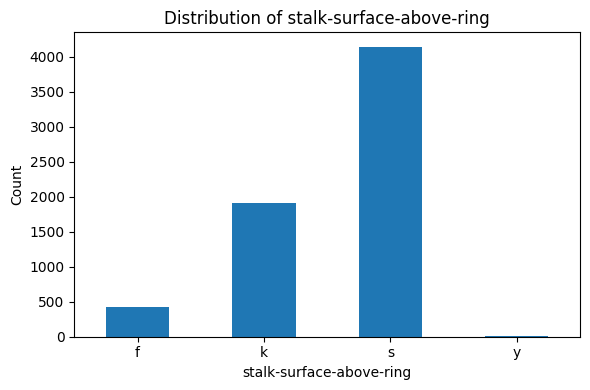

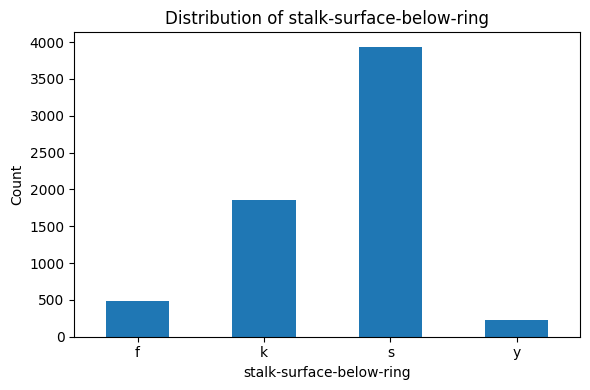

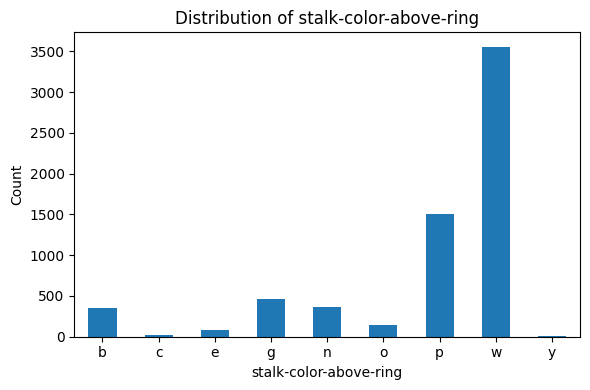

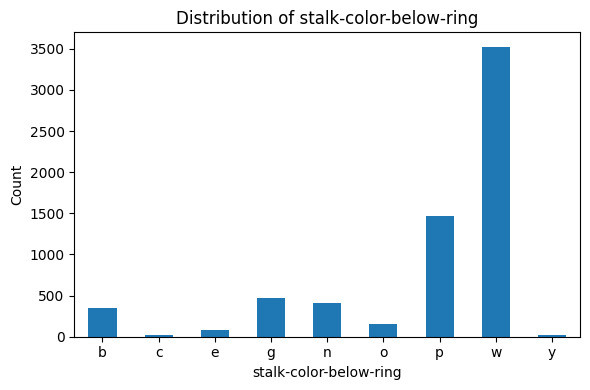

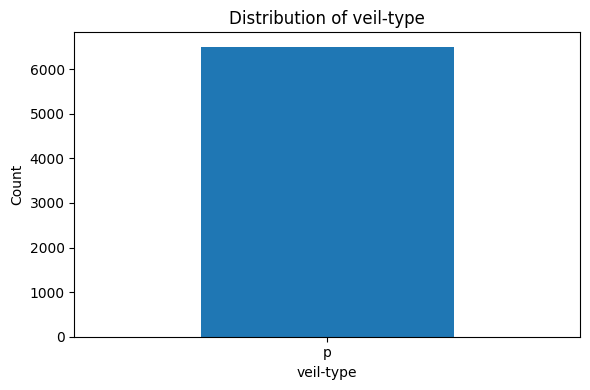

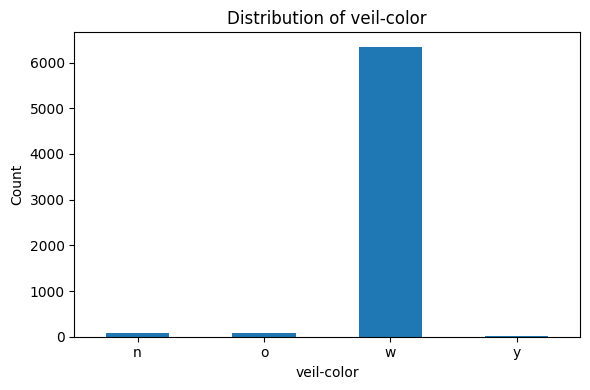

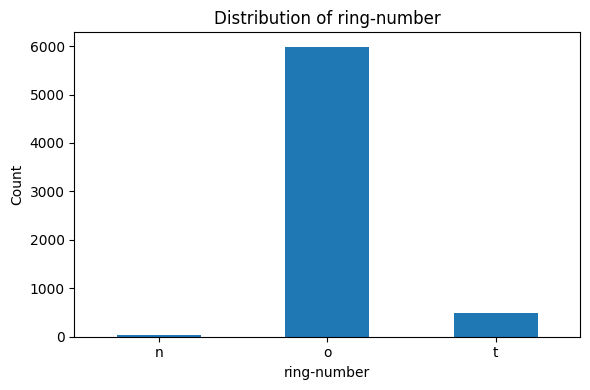

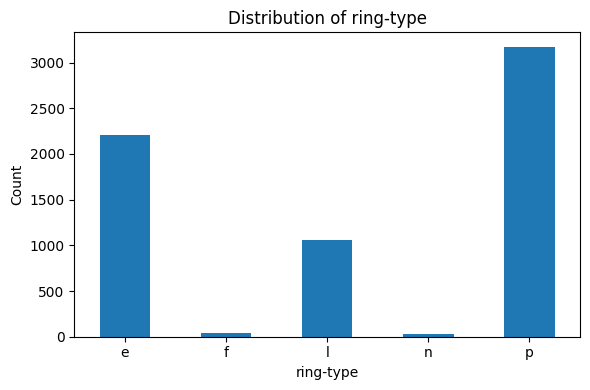

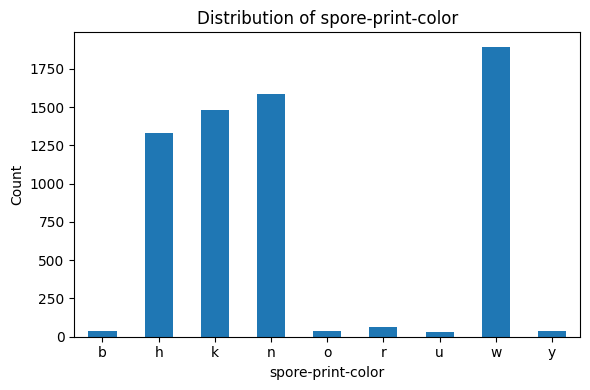

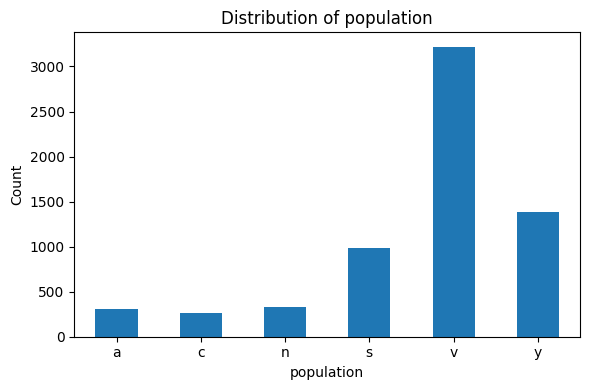

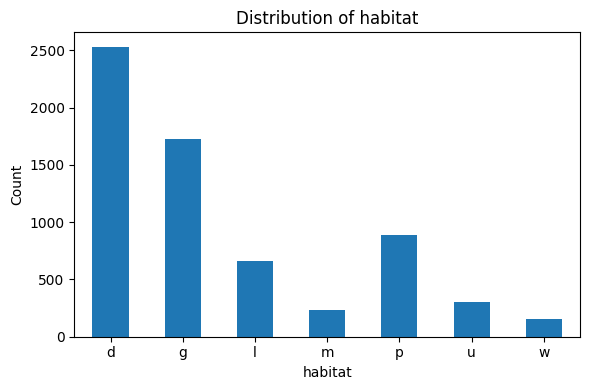

In [ ]:
import matplotlib.pyplot as plt

for col in mushroom.columns:
    plt.figure(figsize=(6, 4))
    mushroom[col].value_counts().sort_index().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [ ]:
def compare_distributions(df, desired_columns):
    for col in desired_columns:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

        # Value counts for class 'e'
        df[df['class'] == 'e'][col].value_counts().sort_index().plot(
            kind='bar', ax=axes[0], color='green'
        )
        axes[0].set_title(f'{col} (edible)')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Count')
        axes[0].tick_params(axis='x', rotation=0)

        # Value counts for class 'p'
        df[df['class'] == 'p'][col].value_counts().sort_index().plot(
            kind='bar', ax=axes[1], color='red'
        )
        axes[1].set_title(f'{col} (poisonous)')
        axes[1].set_xlabel(col)
        axes[1].tick_params(axis='x', rotation=0)

        plt.tight_layout()
        plt.show()

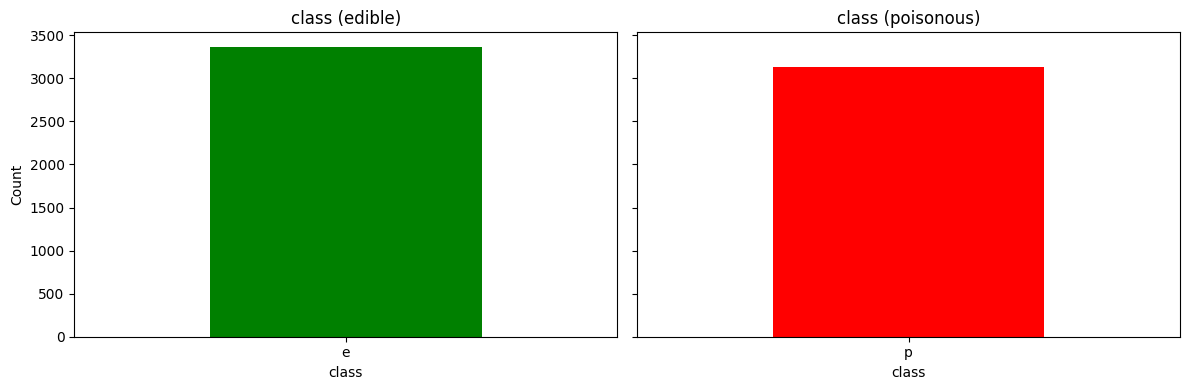

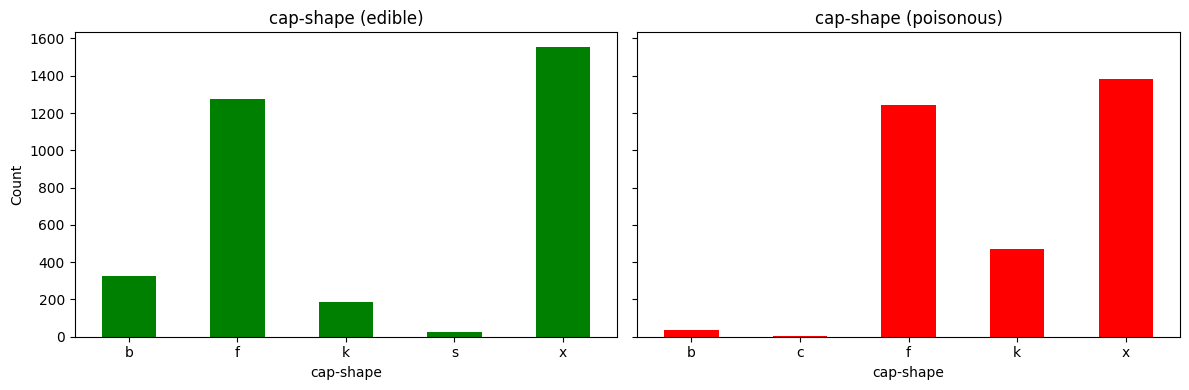

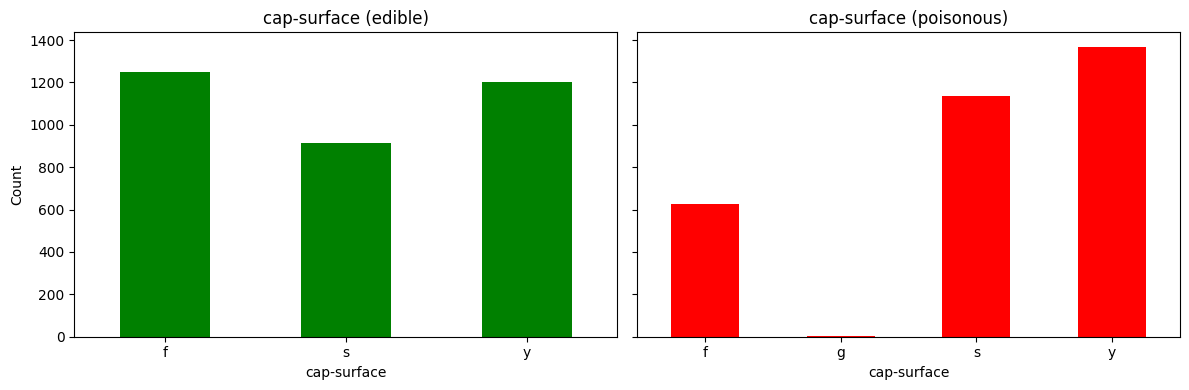

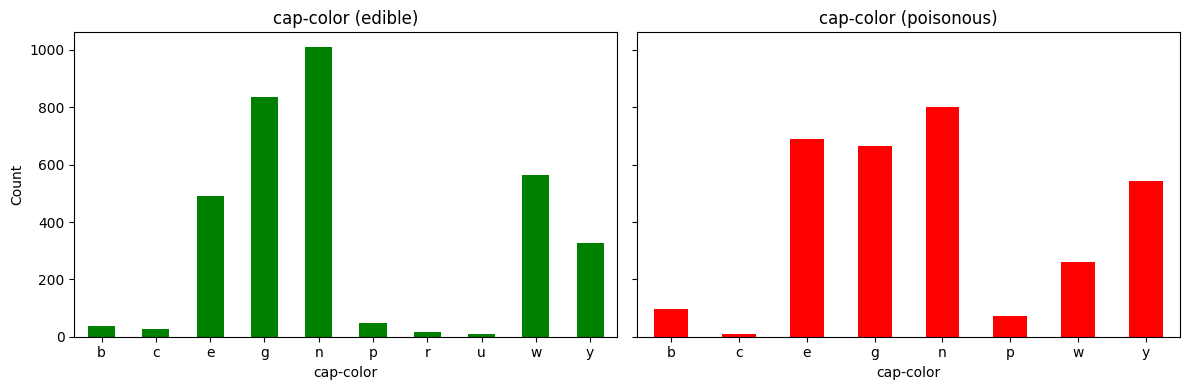

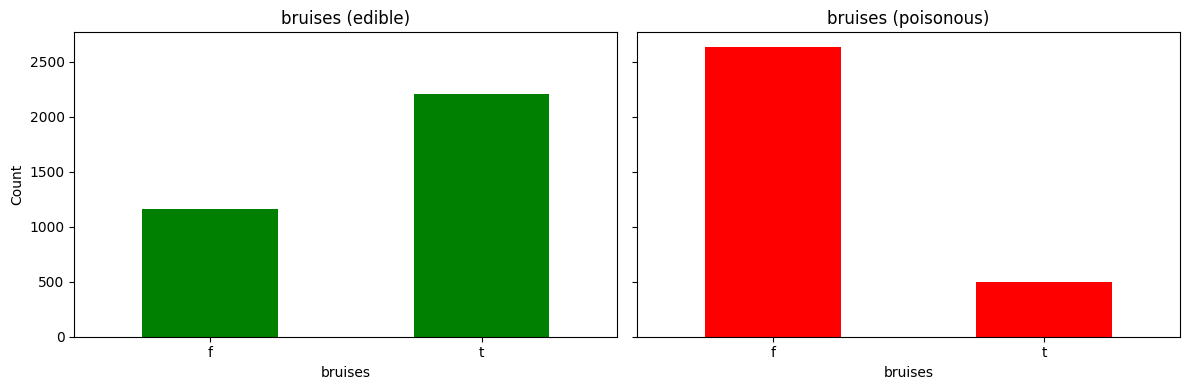

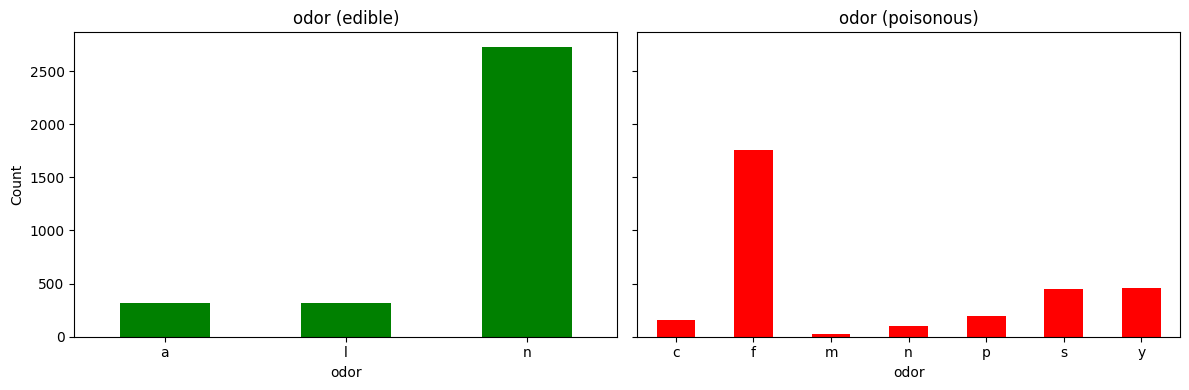

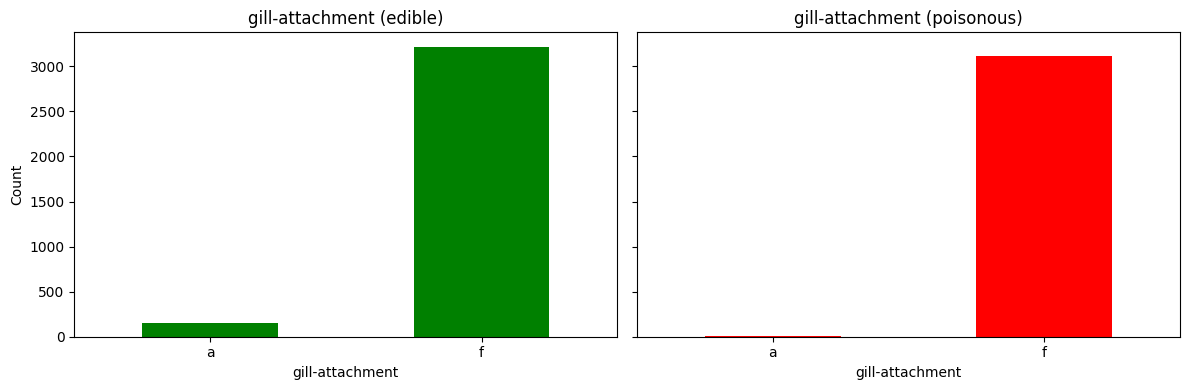

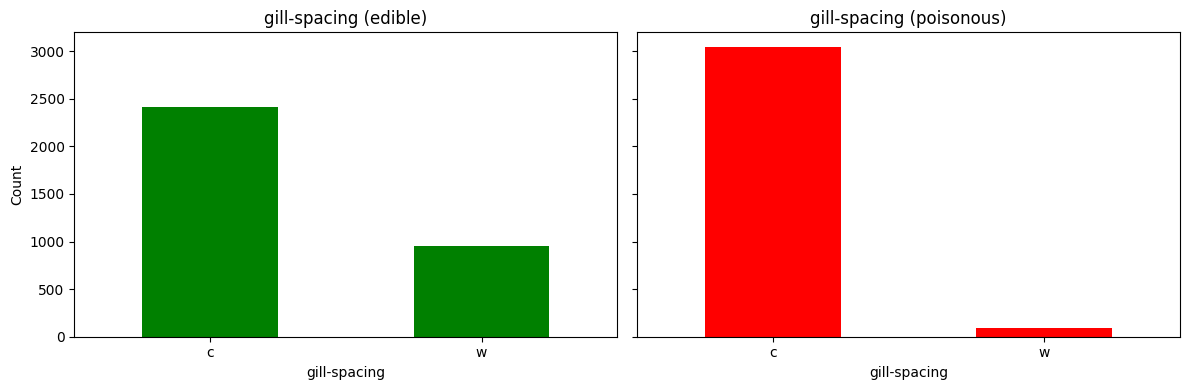

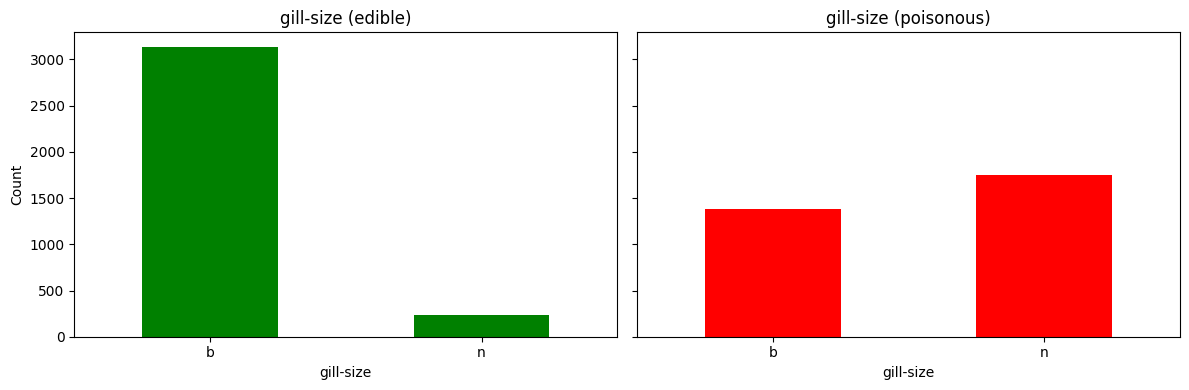

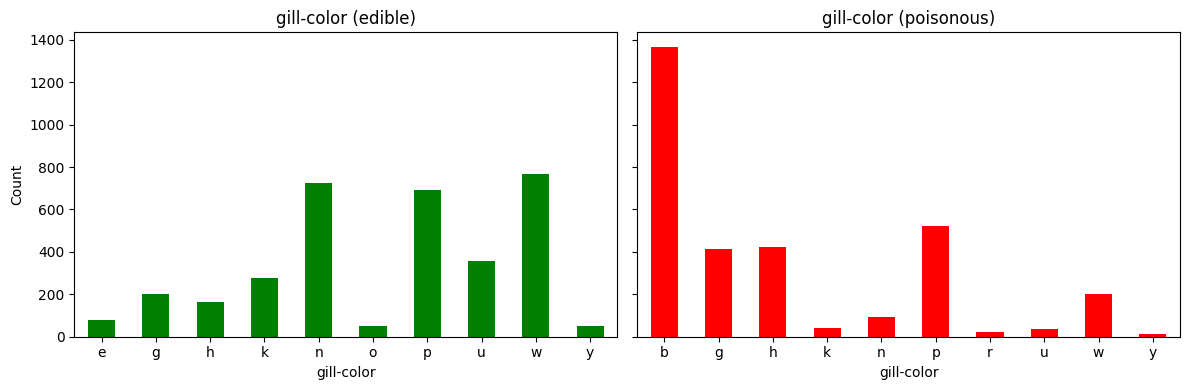

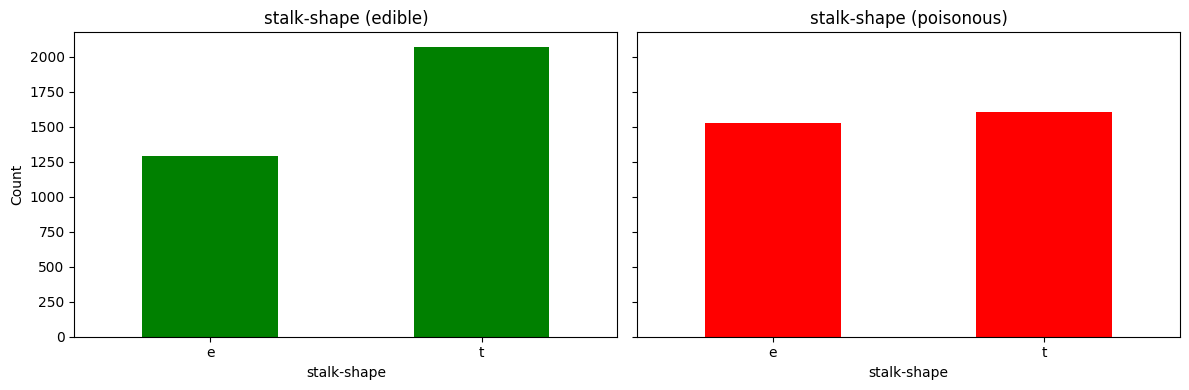

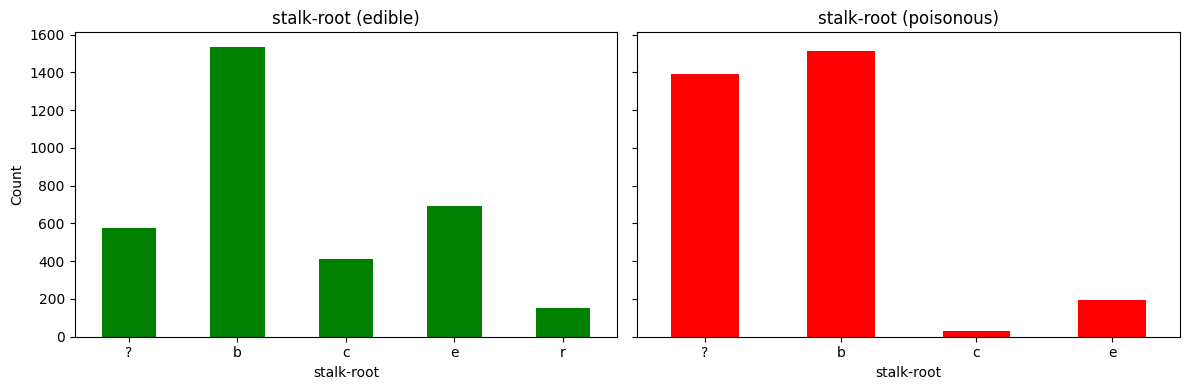

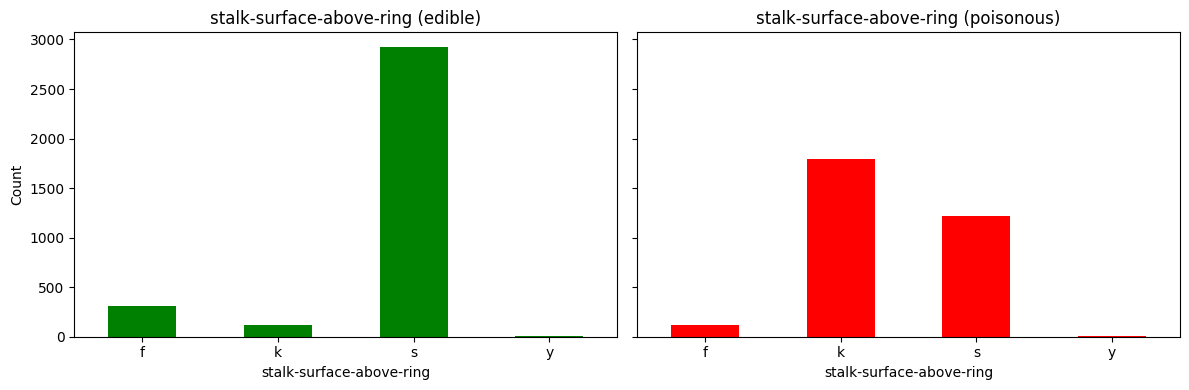

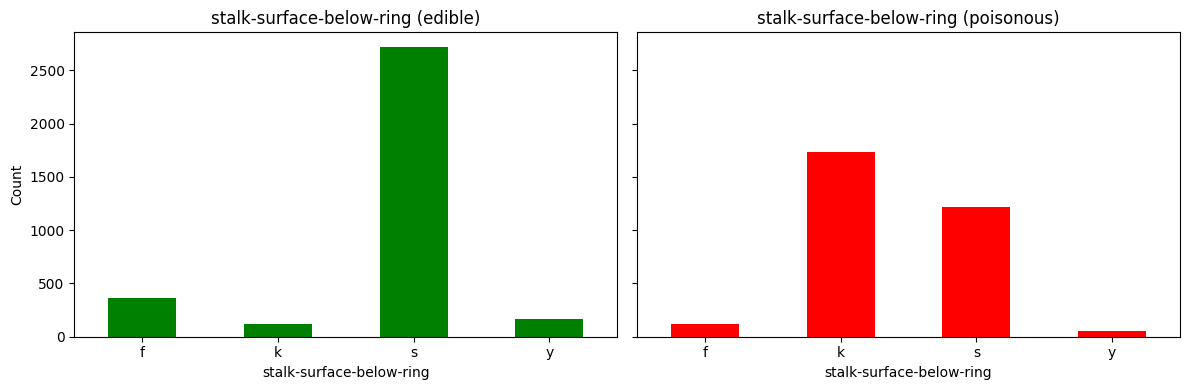

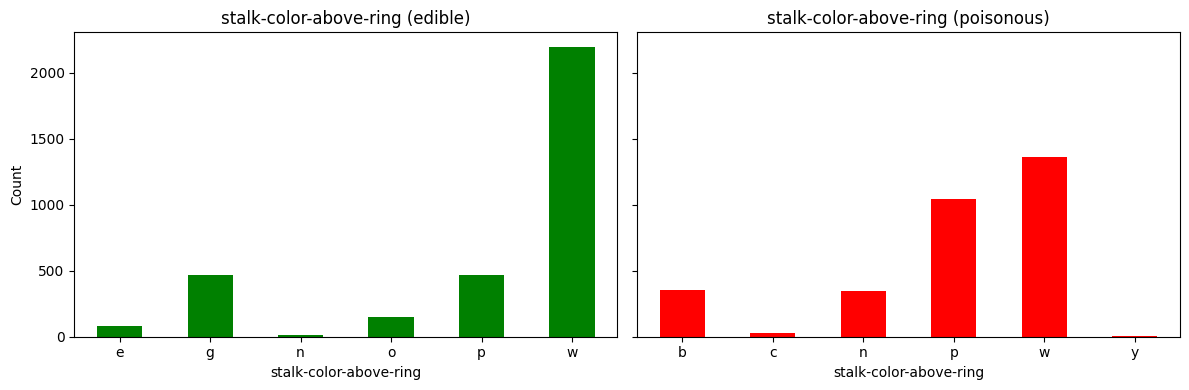

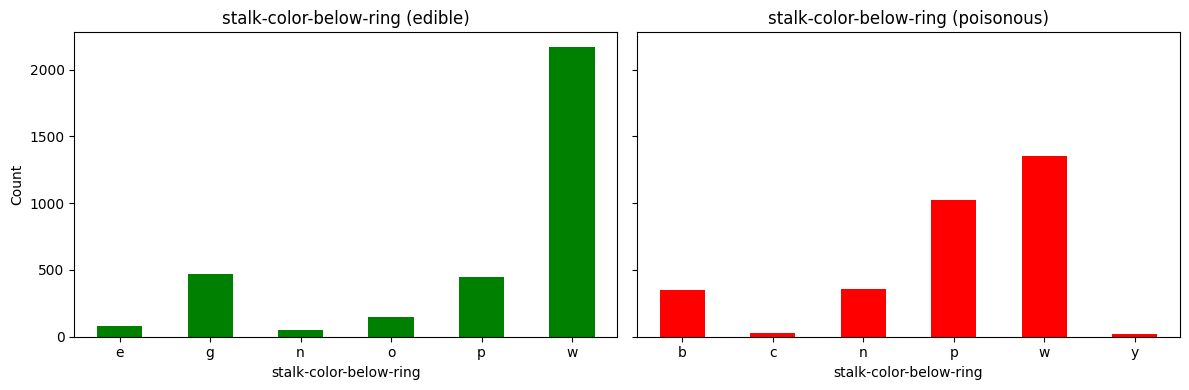

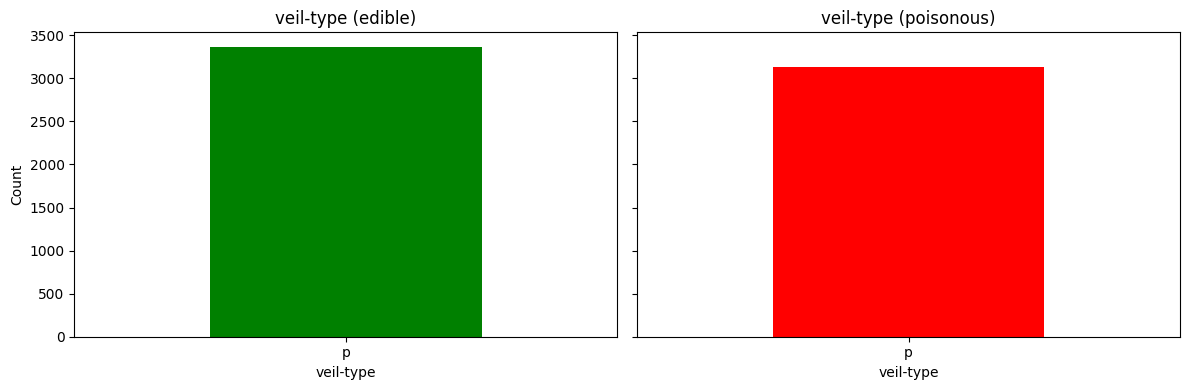

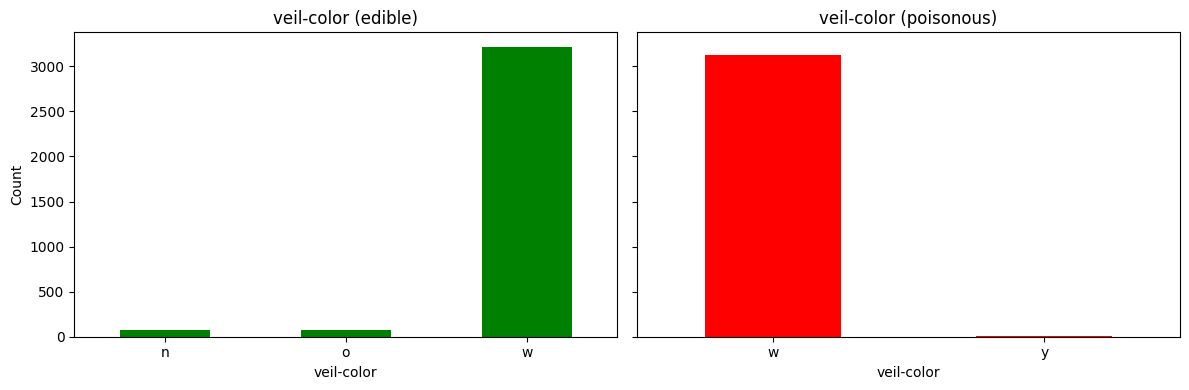

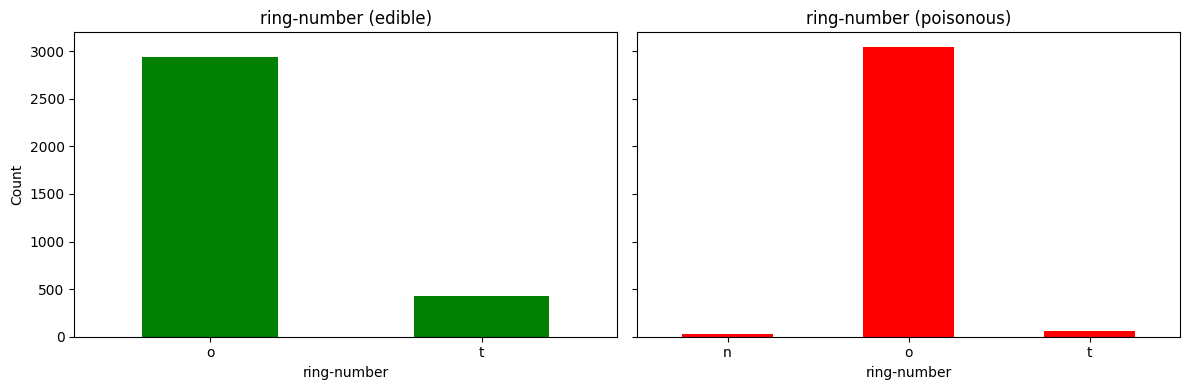

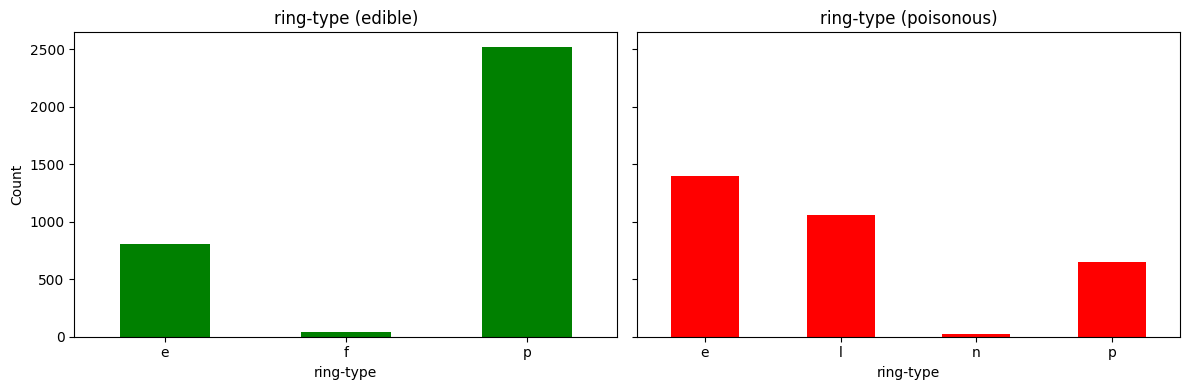

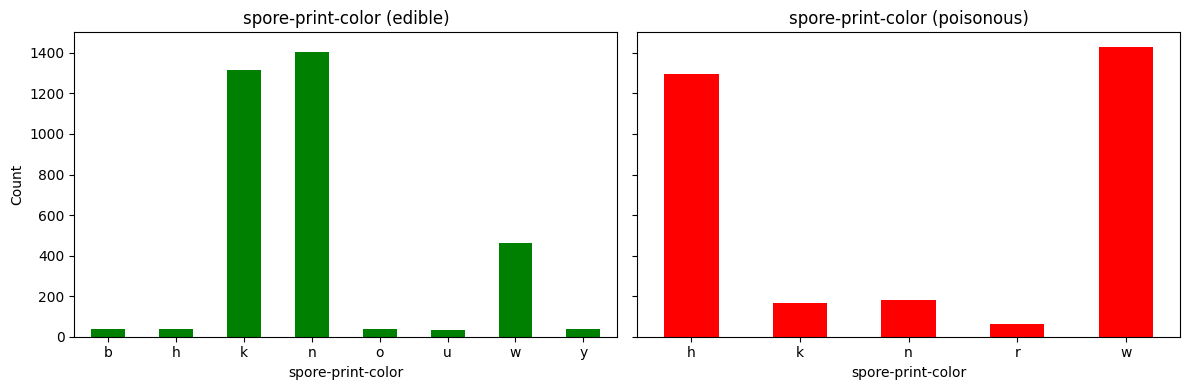

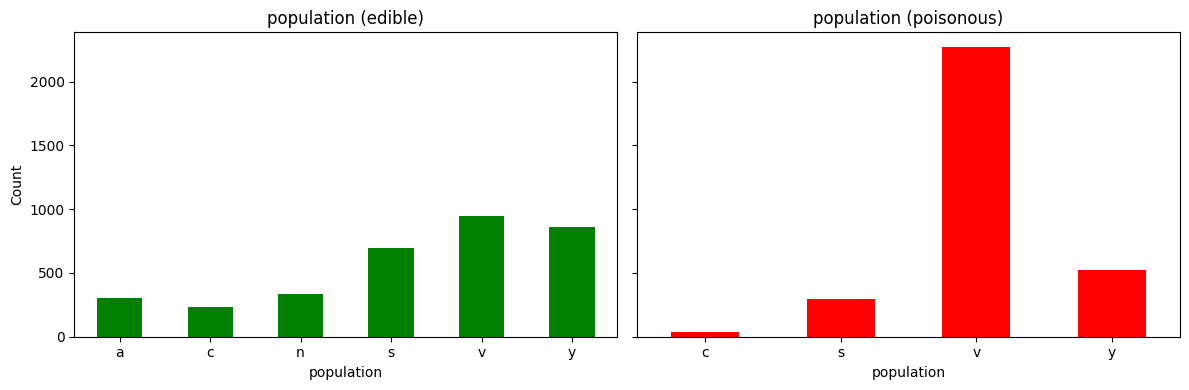

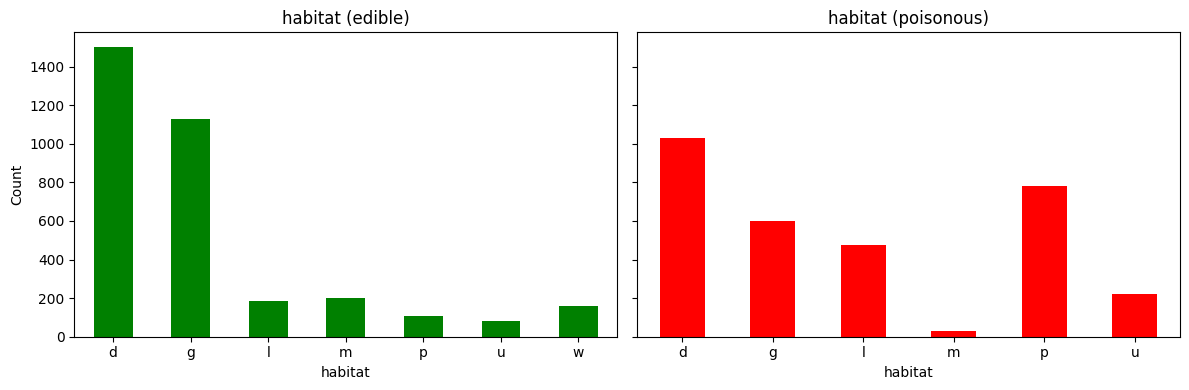

In [ ]:
compare_distributions(mushroom, mushroom.columns)

We can note that:

**Poisonous Mushrooms**
*   Tend to have a population of "several" (meaning we are more likely to find a lot of them together)
*  Usually have chocolate and white spore print colors
* All mushrooms with a large or no ring are poisonous
* Most poisonous mushrooms have a buff colored gill and all buff colored gill mushrooms are poisonous
* Most poisonous mushrooms have a close gill spacing
* Most poisonous mushrooms have foul odor and all foul smelling mushrooms are poisonous

**Edible Mushrooms**  
* Usually have black and brown spore print colors (some also fave chocolate color, but that color is more likely to be poisonous)
* Usually have a pendant ring type
* All mushrooms with a gray stalk color below or above the ring are edible
* Most edible mushrooms have a broad gill size
* Most edible mushrooms have no odor and most mushrooms with no odor are edible

In [ ]:
(mushroom == '?').any().sort_values(ascending=False).head(2)

,0
stalk-root,True
stalk-surface-above-ring,False


In [ ]:
mushroom['stalk-root'].value_counts()/len(mushroom['stalk-root'])

,count
stalk-root,
b,0.469149
?,0.302816
e,0.136483
c,0.068164
r,0.023388


Only stalk root has missing values (?)

## Transforming

In [ ]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5249,p,f,y,y,f,f,f,c,b,g,...,k,p,b,p,w,o,l,h,y,g
5781,e,x,s,p,t,n,f,c,b,e,...,s,e,w,p,w,t,e,w,c,w
7586,e,b,s,g,f,n,f,w,b,w,...,s,w,w,p,w,t,p,w,s,g
6181,p,f,s,n,f,s,f,c,n,b,...,k,p,w,p,w,o,e,w,v,d
7338,p,k,y,n,f,f,f,c,n,b,...,k,p,p,p,w,o,e,w,v,p


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class ClassProcessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.output_feature_names_ = ["is_poisonous"]
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.where(X == 'p', 1, 0).reshape(-1, 1)

    def get_feature_names_out(self, input_features=None):
        return self.output_feature_names_


In [ ]:
def split_x_y(df):
    return df.drop('class', axis=1), df['class']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder



In [ ]:
mushroom_x, mushroom_y = split_x_y(mushroom)



In [ ]:
class_processor = ClassProcessor()

mushroom_y = class_processor.fit_transform(mushroom_y)
mushroom_y = pd.DataFrame(mushroom_y, columns=class_processor.get_feature_names_out())

In [ ]:
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
mushroom_x = one_hot_encoder.fit_transform(mushroom_x)

# 2. Predict

## Fitting an RFC

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier()


# Train the model
rf_model.fit(mushroom_x, mushroom_y)

print("Random Forest model trained successfully.")

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest model trained successfully.


In [ ]:
mushroom_test_x, mushroom_test_y = split_x_y(mushroom_test)

mushroom_test_y = class_processor.transform(mushroom_test_y)
mushroom_test_x = one_hot_encoder.transform(mushroom_test_x)

In [ ]:
mushroom_test_y_pred = rf_model.predict(mushroom_test_x)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

acc = accuracy_score(mushroom_test_y, mushroom_test_y_pred)
print(f"Accuracy: {acc}")

NameError: name 'mushroom_test_y' is not defined

In [ ]:
cm = confusion_matrix(mushroom_test_y, mushroom_test_y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[842   0]
 [  0 783]]


## Retrieving the feature importances

In [ ]:
col_names = one_hot_encoder.get_feature_names_out()
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': col_names,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

In [ ]:
feature_importance_df

,feature,importance
27,odor_n,0.128011
24,odor_f,0.097801
35,gill-size_b,0.063616
37,gill-color_b,0.049766
36,gill-size_n,0.045061
...,...,...
31,gill-attachment_a,0.000051
43,gill-color_o,0.000000
75,stalk-color-below-ring_e,0.000000
82,veil-type_p,0.000000


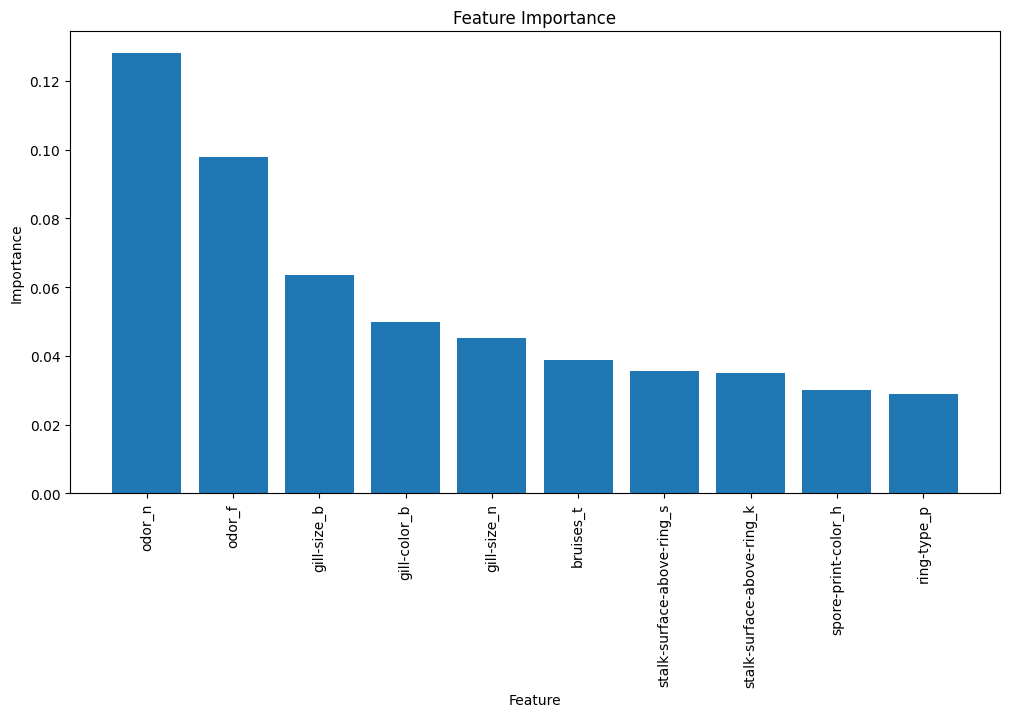

In [ ]:
top_10_features = feature_importance_df.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_features['feature'], top_10_features['importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()

Most important difference between safe and poisonous mushrooms is the odor: no odor => good, foul odor => bad.  
Also a broad gill size is a good way to tell if a mushroom is good  
A buff gill color is a good way to tell if the mushroom is bad
  
These, however, are features we already noticed in the data exploration stage.

In [ ]:
feature_importance_df['group'] = feature_importance_df['feature'].str.extract(r'^([^_]+)')
grouped = feature_importance_df.groupby('group')['importance'].sum().sort_values(ascending=False)

print(grouped)

group
odor                        0.269523
gill-size                   0.108677
stalk-surface-above-ring    0.072379
spore-print-color           0.068054
ring-type                   0.063341
gill-color                  0.059647
bruises                     0.057603
stalk-root                  0.057564
stalk-surface-below-ring    0.044332
population                  0.034391
gill-spacing                0.033344
habitat                     0.033075
stalk-shape                 0.025787
cap-color                   0.014870
stalk-color-above-ring      0.013887
ring-number                 0.013110
stalk-color-below-ring      0.012931
cap-surface                 0.012140
cap-shape                   0.004078
veil-color                  0.000932
gill-attachment             0.000336
veil-type                   0.000000
Name: importance, dtype: float64


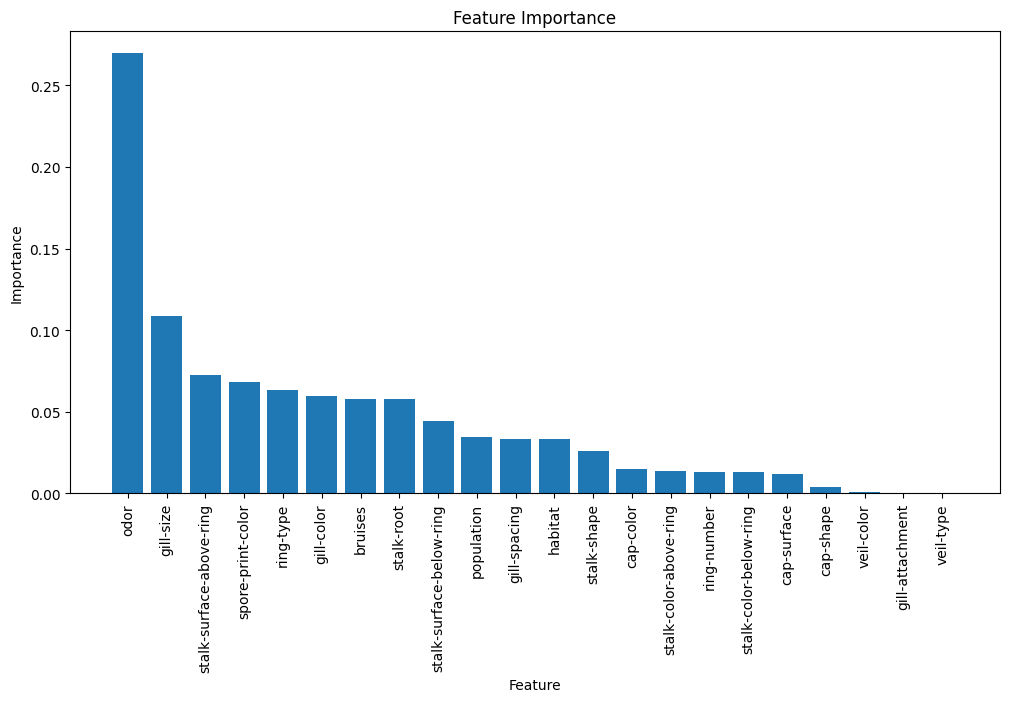

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(grouped.index, grouped.values)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()

We can see that the veil type, gill attachment, and veil color are really bad attributes to judge a mushroom by...   
Odor, gill size, and the stalk surface above the ring are the best attributes to judge them by.

In [ ]:
desired_columns = grouped.index[:5]
desired_columns.tolist()

['odor',
 'gill-size',
 'stalk-surface-above-ring',
 'spore-print-color',
 'ring-type']

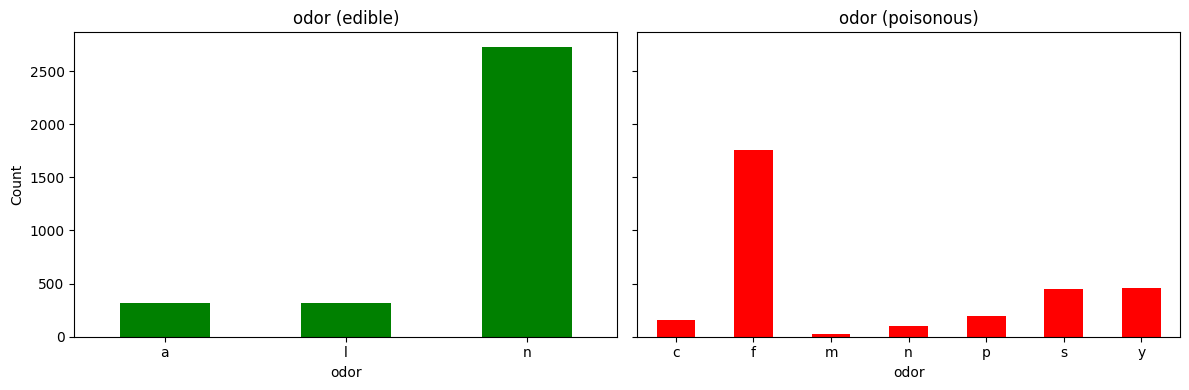

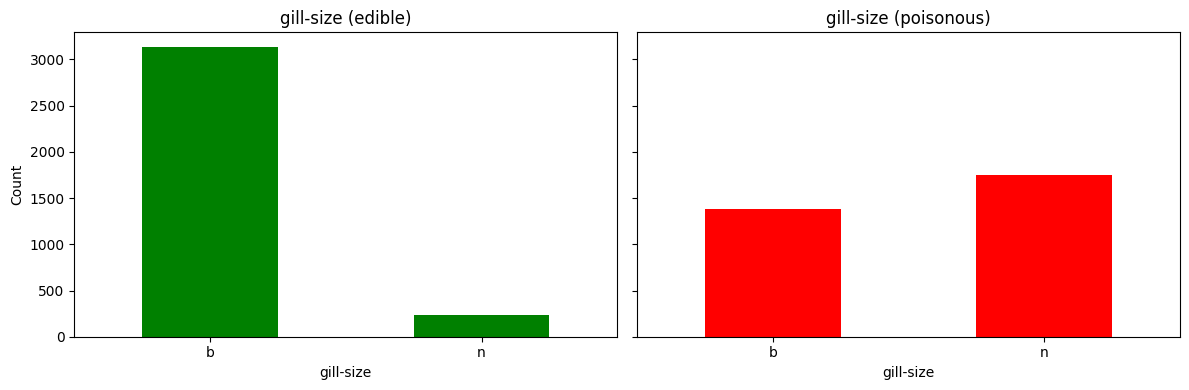

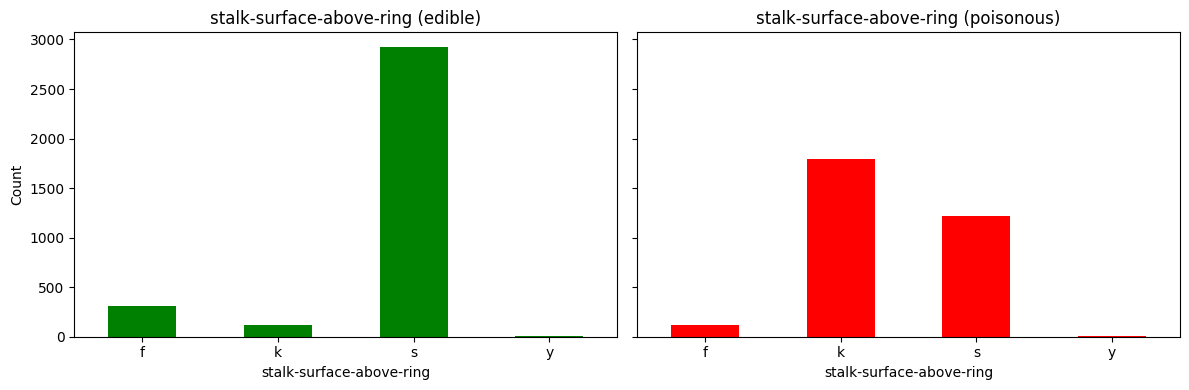

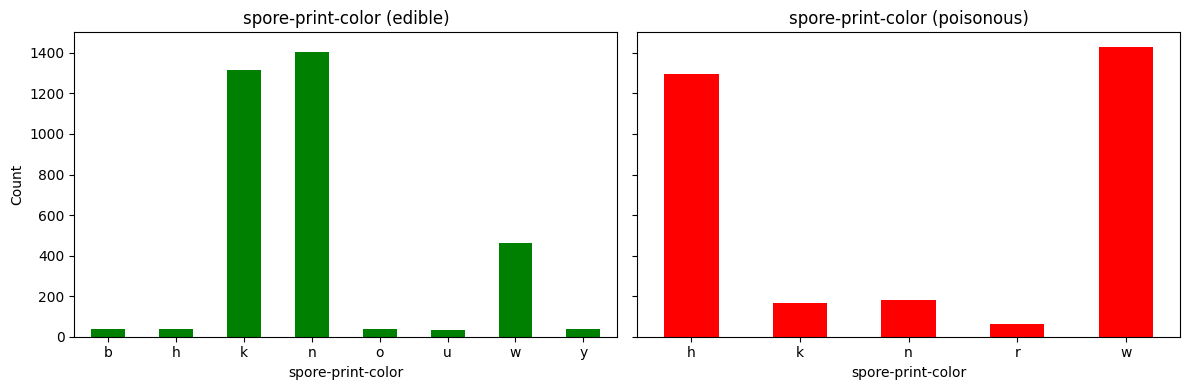

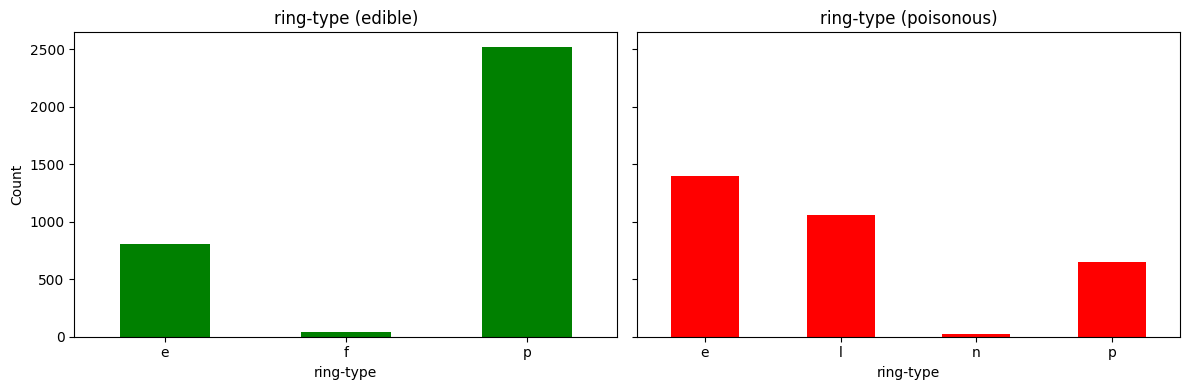

In [ ]:
desired_columns = grouped.index[:5].tolist()

for col in desired_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

    # Value counts for class 'e'
    mushroom[mushroom['class'] == 'e'][col].value_counts().sort_index().plot(
        kind='bar', ax=axes[0], color='green'
    )
    axes[0].set_title(f'{col} (edible)')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=0)

    # Value counts for class 'p'
    mushroom[mushroom['class'] == 'p'][col].value_counts().sort_index().plot(
        kind='bar', ax=axes[1], color='red'
    )
    axes[1].set_title(f'{col} (poisonous)')
    axes[1].set_xlabel(col)
    axes[1].tick_params(axis='x', rotation=0)

    plt.tight_layout()
    plt.show()